<center><h1>ITIT-4103-2021</h1></center>
<center><h3>Assignment 4</h3></center>

- **Name**: Aadit Agarwal
- **Roll No**: 2018IMT-001
- **Course**: Machine Learning Lab
- **Course Code**: ITIT-4107-2021

## Problem Statement

### Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.
### The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

## Objectives

1. Use a scatter plot to visualize the data, since it has only two properties to plot (profit and population).
2. Consider a simple linear model with two parameters and one input variable and mean square error cost function to implement the gradient descent algorithm to find the intercepts. Assume a  suitable terminating condition. 
3. Plot the model alongside the scatterplot to show the fit model.
4. Perform steps 1,2,3 in batch mode for varying values of alpha, learning rate and plot the results.
5. For each of the experiments performed above in steps 1,2,3,4 with varying learning rates visualize the cost function as a contour plot as well as plot the values of parameters to visualize the stepwise traversion of the parameters on this contour plot.

## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data Loading

In [5]:
data = pd.read_csv('./ex1data1.txt', names = ['population','profit'], header = 0)
x = data['population'].values
y = data['profit'].values

## Data Description

In [6]:
# Data Top 5
data.head() 

,population,profit
0,5.5277,9.1302
1,8.5186,13.6620
2,7.0032,11.8540
3,5.8598,6.8233
4,8.3829,11.8860


In [9]:
# Values description
data.describe()

,population,profit
count,96.000000,96.000000
mean,8.181151,5.716709
std,3.884451,5.404947
min,5.026900,-2.680700
25%,5.690950,1.952550
50%,6.735950,4.455300
75%,8.639925,6.879150
max,22.203000,24.147000


## Objective-1: Use a scatter plot to visualize the data, since it has only two properties to plot (profit and population).

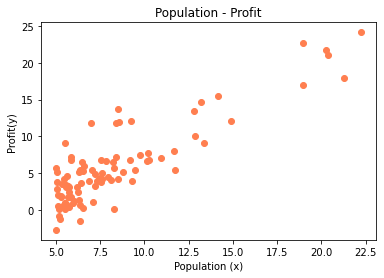

In [12]:
# Visualization of Data on Scatter plot
plt.subplot(1,1,1)
plt.title('Population - Profit')
plt.xlabel('Population (x)')
plt.ylabel('Profit(y)')
plt.scatter(x,y,color='coral')

## Objective-2: Consider a simple linear model with two parameters and one input variable and mean square error cost function to implement the gradient descent algorithm to find the intercepts. Assume a  suitable terminating condition.

In [14]:
# Mean Squared Cost Function
def computeCost(X,y,theta):
    n=len(y)
    predictions=X.dot(theta)
    mean_square_error=(predictions - y)**2
    
    return (1/(2*n) * np.sum(mean_square_error))

# Gradient Descent function for Learning
def gradientDescent(X,y,theta,alpha,num_iters):
    n=len(y)
    jHistory=[]
    for i in range(num_iters):
        predictions = X.dot(theta)
        error = np.dot(X.transpose(),(predictions -y))
        descent=alpha * 1/n * error
        theta-=descent
        jHistory.append(computeCost(X,y,theta))
    
    return theta, jHistory

## Data Preparation

In [15]:
X_vals = np.append(np.ones((len(data),1)),x.reshape(len(data),1),axis=1)
y_vals = y.reshape(len(data),1)
theta = np.zeros((2,1))

## Initial Cost

In [17]:
print("Initial Cost: ", computeCost(X_vals,y_vals,theta))

Initial Cost:  30.79495785534583


## Learning

In [18]:
alpha = 0.01
num_iters = 2000
theta_fm , minimization_vals = gradientDescent(X_vals, y_vals, theta, alpha, num_iters)
print("Final Cost: ", minimization_vals[-1])
print("Learning Rate: ", alpha)
print("Theta0: ", theta_fm[1][0])
print("Theta1: ", theta_fm[0][0])

Final Cost:  3.4607977566447357
Learning Rate:  0.01
Theta0:  1.2019828099933145
Theta1:  -4.096042041910448


## Objective-3: Plot the model alongside the scatterplot to show the fit model.

Text(0, 0.5, 'Profit')

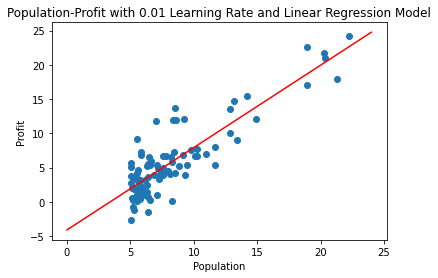

In [22]:
fig, ax = plt.subplots(1,1)
ax.scatter(x,y)
x_value=[x for x in range(25)]
y_value=[y*theta[1]+theta[0] for y in x_value]
ax.plot(x_value,y_value,color="r")
ax.set_title("Population-Profit with 0.01 Learning Rate and Linear Regression Model")
ax.set_xlabel("Population")
ax.set_ylabel("Profit")

## Objective-4: Perform steps 1,2,3 in batch mode for varying values of alpha, learning rate and plot the results.

In [28]:
# Various Learning Rates  
alpha_values = np.arange(0.001, 0.02, 0.002)
J_histories =[]
model_plots = []
theta_values = []

# Model Learning with Various Learning Rates
for i in range(10):
    theta=np.zeros((2,1))
    theta_values.append(theta)
    alpha = alpha_values[i]
    theta,J_history = gradientDescent(X_vals,y_vals,theta,alpha,100)
    J_histories.append(J_history)
    model_plots.append([alpha, theta])

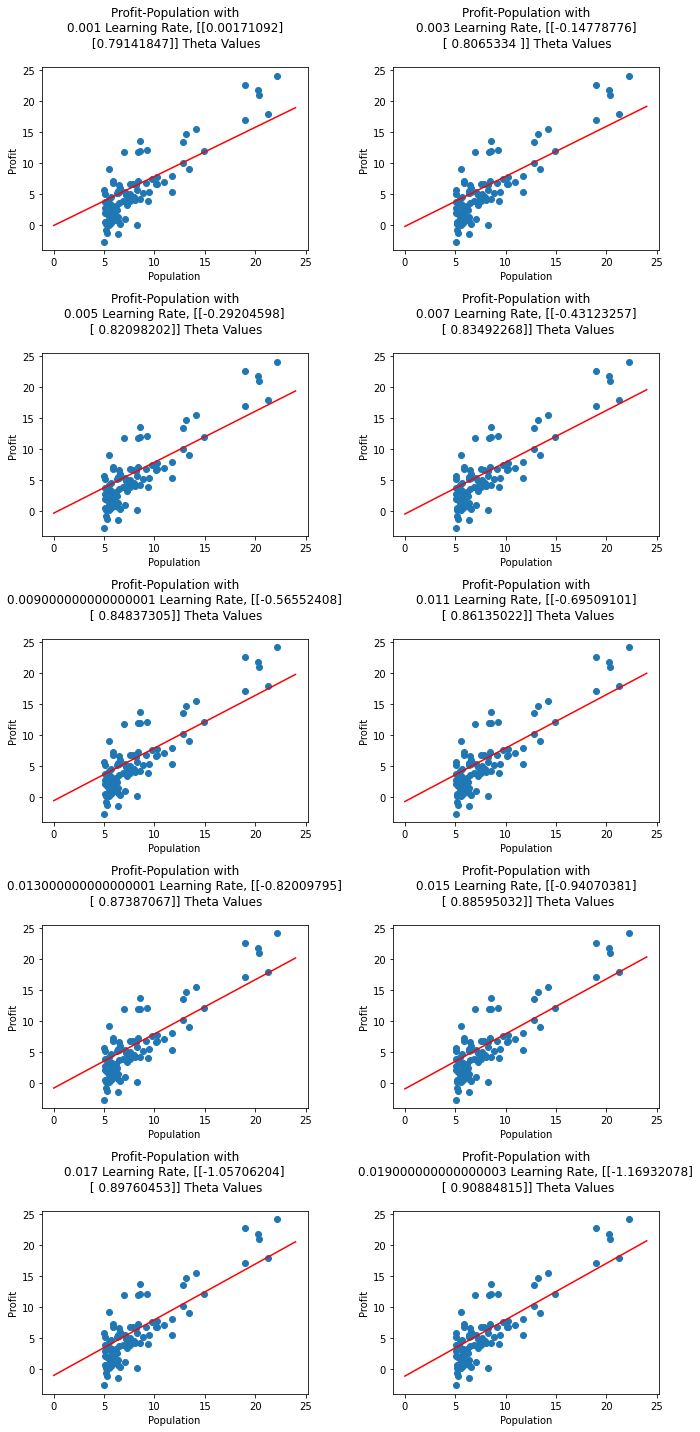

In [29]:
# Visualization of Models with Various Learning Rates 
fig, ax = plt.subplots(5,2,figsize=(10,20))
itr = 0
for i in range(5):
    for j in range(2):
        ax[i][j].scatter(x,y)
        ax[i][j].set_title(f"Profit-Population with\n{str(alpha_values[itr])} Learning Rate, {str(theta_values[itr])} Theta Values\n")
        theta_m = model_plots[itr][1]
        x_value=[x for x in range(25)]
        y_value=[y*theta_m[1]+theta_m[0] for y in x_value]
        ax[i][j].plot(x_value,y_value,color="r")
        ax[i][j].set_xlabel("Population")
        ax[i][j].set_ylabel("Profit")
        itr += 1
fig.tight_layout()

## Objective-5: For each of the experiments performed above in steps 1,2,3,4 with varying learning rates visualize the cost function as a contour plot as well as plot the values of parameters to visualize the stepwise traversion of the parameters on this contour plot.

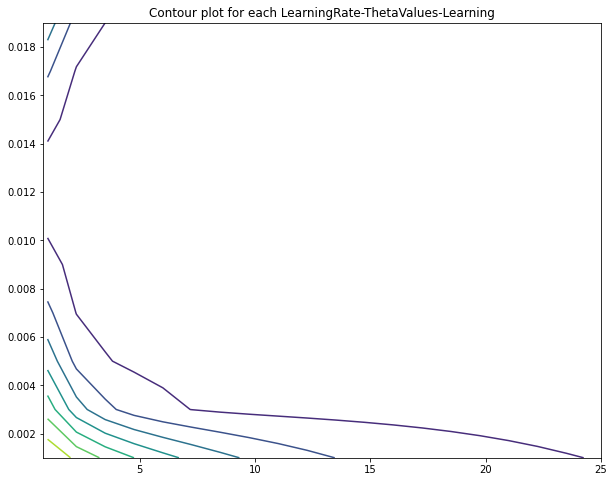

In [40]:
# Step-wise Learning 
x = np.arange(1,125,1.25)
# Learning Rates
y = alpha_values

z = J_histories
fig, ax = plt.subplots(1, 1,figsize=(10, 8))
ax.set_title("Contour plot for each LearningRate-ThetaValues-Learning")
ax.set_xlim(.8, 25)
ax.contour(x,y,z)
plt.show()

## Inference

1. f slope is +ve : Value of theta[j] decreases. <br >
2. If slope is -ve : value of theta[j] increases. <br >
3. The choice of correct learning rate is very important as it ensures that Gradient Descent converges in a reasonable time:
<br >3.1 If we choose α to be very large, Gradient Descent can overshoot the minimum. It may fail to converge or even diverge.
<br >3.2 	If we choose α to be very small, Gradient Descent will take small steps to reach local minima and will take a longer time to reach minima.

### Code Link: hhttps://github.com/aaditagarwal/ITIT-4103-2021/tree/main/Assignment%204